# Model Evaluation and Comparison

ith this Notebook, you can compare different models and the feature/treatment embeddings they produced.

## Features:
- **Accuracy Comparison** - Using functions from `model_comparison.py`
- **2D Embeddings** - Using functions from `visualize_embeddings.py`  
- **Similarity Analysis** - Model feature similarity comparisons
- **Performance Metrics** - 1-NN evaluation with different distance measures

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path for imports
sys.path.append('../')

# Import visualization functions
from evaluation.visualization.model_comparison import (
    plot_accuracy_comparison, 
    plot_confusion_matrices, 
    plot_similarity_comparison,
    compare_all_models
)
from evaluation.visualization.visualize_embeddings import (
    plot_tsne_comparison,
    plot_umap_comparison
)

print("Imported visualization and evaluation functions")

Imported visualization and evaluation functions


## Config

Here you can choose which models you want to compare. Each model you want to compare should have treatment profiles created already. If you did not create any profiles, you can do so by using our extractor.

You can also choose the distance metrics, that the treatments should be compared with. The plots will be stored under our Ramses default path, if you want to save your plots somewhere else adjust the output path.

In [2]:
# Configuration - Edit these to customize your analysis
MODELS_TO_COMPARE = [
    'base_resnet',
    'simclr_vanilla_ws_neg', 
    'simclr_vanilla',
    'simclr_ws_collapsed'
]

DATA_ROOT = "/scratch/cv-course2025/group8"
OUTPUT_DIR = "/scratch/cv-course2025/group8/plots"
DISTANCE_MEASURES = ['cosine']

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Models to compare: {MODELS_TO_COMPARE}")
print(f"Distance measures: {DISTANCE_MEASURES}")
print(f"Output directory: {OUTPUT_DIR}")

Models to compare: ['base_resnet', 'simclr_vanilla_ws_neg', 'simclr_vanilla', 'simclr_ws_collapsed']
Distance measures: ['cosine']
Output directory: /scratch/cv-course2025/group8/plots


1. ACCURACY COMPARISON

--- COSINE Distance ---
Evaluating base_resnet...
Evaluating treatment: alsterpaullone@3.0 (Kinase inhibitors)
  True MOA: Kinase inhibitors, Predicted MOA: Kinase inhibitors, Correct: True
Evaluating treatment: PD-169316@3.0 (Kinase inhibitors)
  True MOA: Kinase inhibitors, Predicted MOA: Kinase inhibitors, Correct: True
Evaluating treatment: etoposide@1.0 (DNA damage)
  True MOA: DNA damage, Predicted MOA: DNA damage, Correct: True
Evaluating treatment: AZ258@0.300048828125 (Aurora kinase inhibitors)
  True MOA: Aurora kinase inhibitors, Predicted MOA: Aurora kinase inhibitors, Correct: True
Evaluating treatment: AZ-C@1.0 (Eg5 inhibitors)
  True MOA: Eg5 inhibitors, Predicted MOA: Eg5 inhibitors, Correct: True
Evaluating treatment: PP-2@10.0 (Epithelial)
  True MOA: Epithelial, Predicted MOA: Protein degradation, Correct: False
Evaluating treatment: latrunculin B@3.0 (Actin disruptors)
  True MOA: Actin disruptors, Predicted MOA: Actin disruptors, Correct: Tr

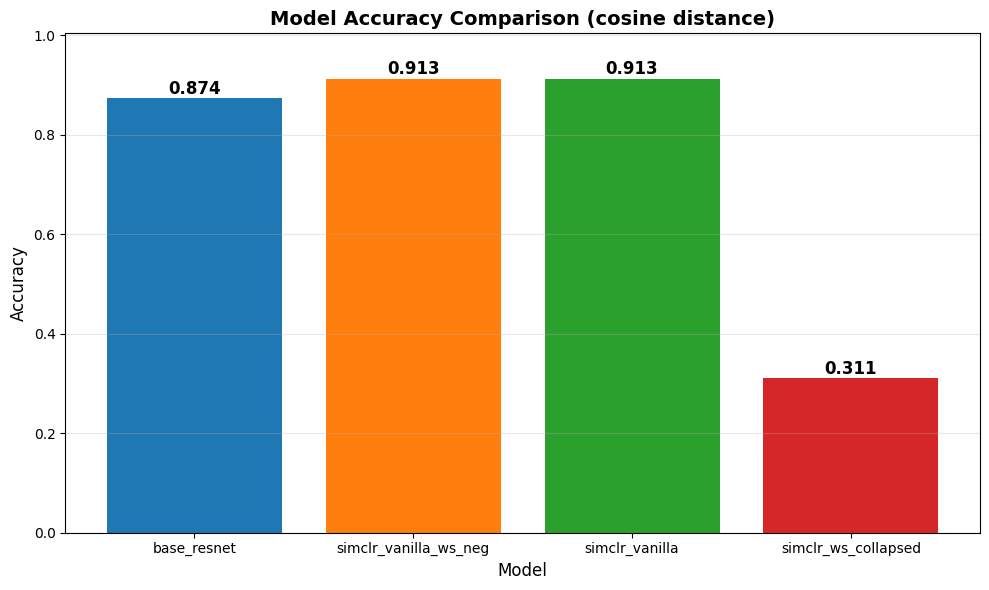

Accuracy comparison saved to /scratch/cv-course2025/group8/plots/accuracy_comparison_cosine.png
  base_resnet: 0.8738
  simclr_vanilla_ws_neg: 0.9126
  simclr_vanilla: 0.9126
  simclr_ws_collapsed: 0.3107


In [3]:
# 1. ACCURACY COMPARISON
print("="*60)
print("1. ACCURACY COMPARISON")
print("="*60)

for distance in DISTANCE_MEASURES:
    print(f"\n--- {distance.upper()} Distance ---")
    accuracies = plot_accuracy_comparison(
        MODELS_TO_COMPARE, 
        data_root=DATA_ROOT,
        output_dir=OUTPUT_DIR,
        distance_measure=distance
    )
    
    # Print results
    for model, acc in accuracies.items():
        print(f"  {model}: {acc:.4f}")


2. CONFUSION MATRICES

Creating confusion matrices for cosine distance...
Creating confusion matrix for base_resnet...
Creating confusion matrix for simclr_vanilla_ws_neg...
Creating confusion matrix for simclr_vanilla...
Creating confusion matrix for simclr_ws_collapsed...


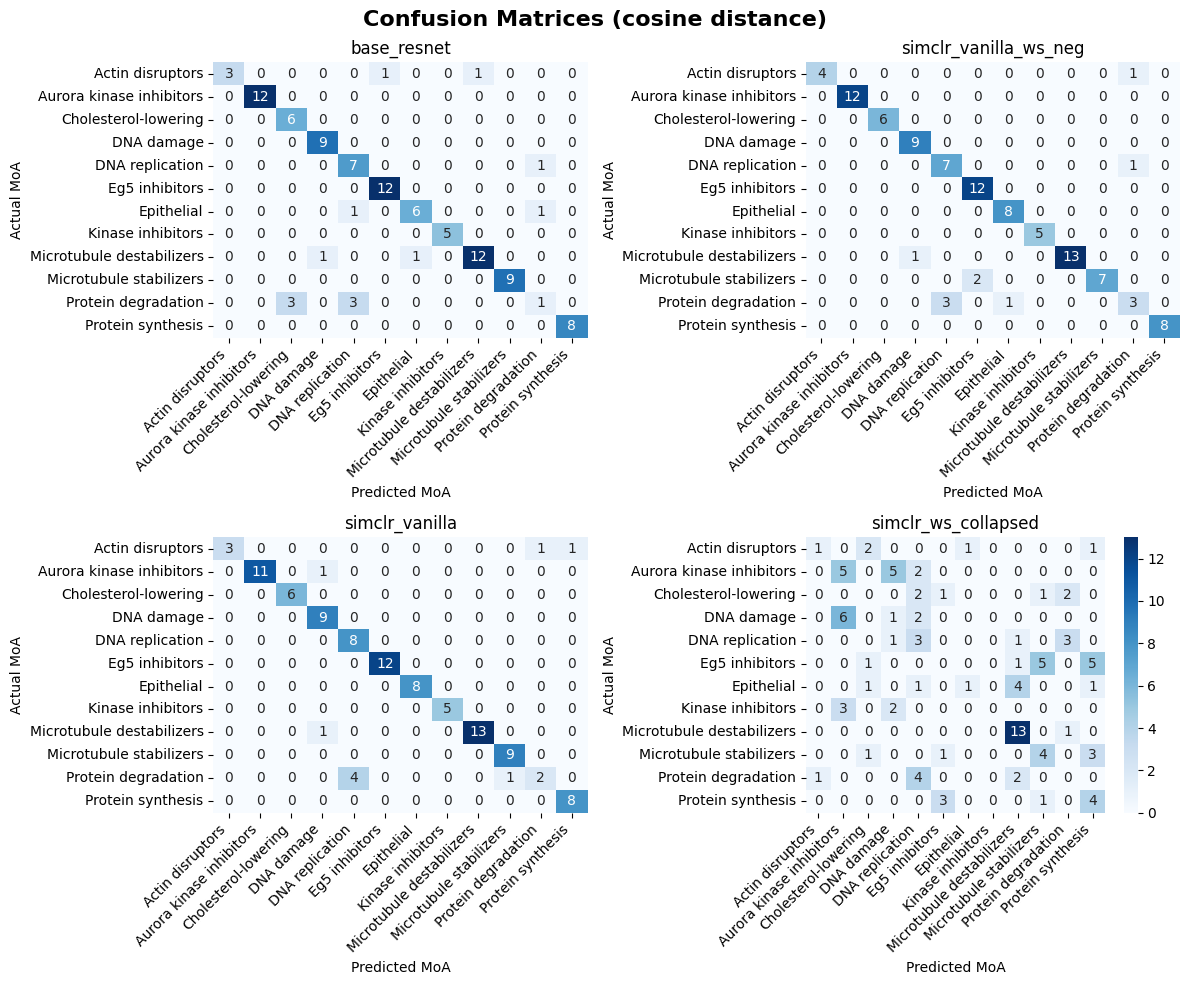

Confusion matrices saved to /scratch/cv-course2025/group8/plots/confusion_matrices_cosine.png


In [4]:
# 2. CONFUSION MATRICES
print("\n" + "="*60)
print("2. CONFUSION MATRICES")
print("="*60)

for distance in DISTANCE_MEASURES:
    print(f"\nCreating confusion matrices for {distance} distance...")
    plot_confusion_matrices(
        MODELS_TO_COMPARE,
        data_root=DATA_ROOT,
        output_dir=OUTPUT_DIR,
        distance_measure=distance
    )


3. SIMILARITY ANALYSIS
Analyzing same-MOA vs different-MOA similarities...
Analyzing similarities for base_resnet...
Analyzing similarities for simclr_vanilla_ws_neg...
Analyzing similarities for simclr_vanilla...
Analyzing similarities for simclr_ws_collapsed...


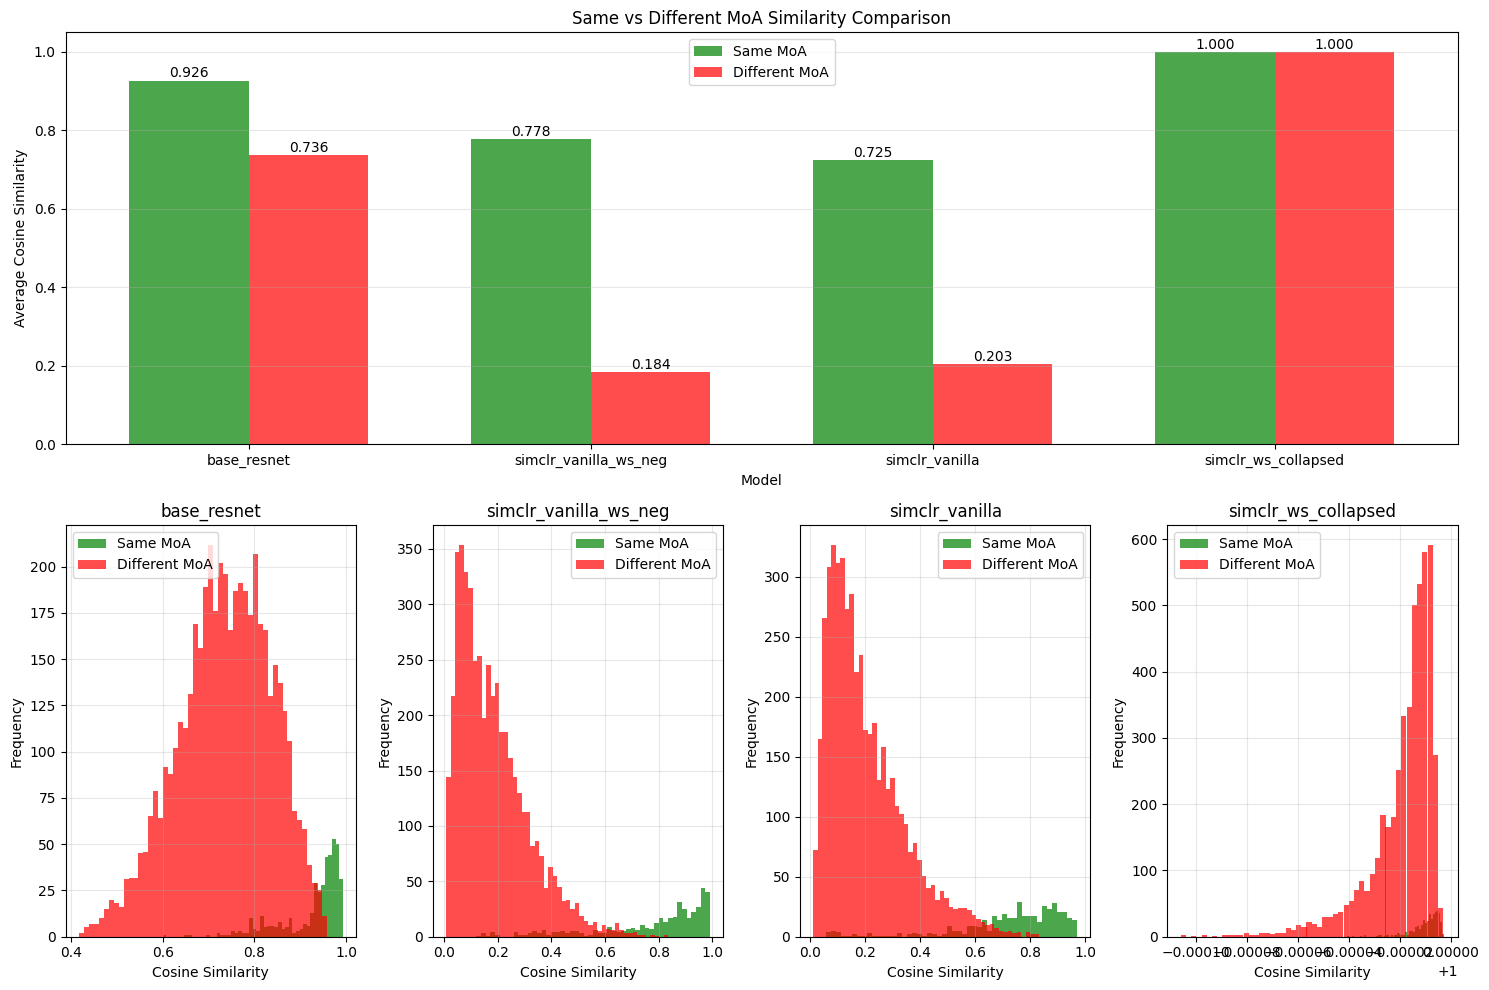

Similarity comparison saved to /scratch/cv-course2025/group8/plots/similarity_comparison.png


{'models': ['base_resnet',
  'simclr_vanilla_ws_neg',
  'simclr_vanilla',
  'simclr_ws_collapsed'],
 'same_moa_means': [0.9262033, 0.77794784, 0.7246893, 0.99999005],
 'diff_moa_means': [0.73639655, 0.18420132, 0.20312105, 0.99998116],
 'separations': [0.18980676, 0.59374654, 0.52156824, 8.881092e-06]}

In [5]:
# 3. SIMILARITY ANALYSIS
print("\n" + "="*60)
print("3. SIMILARITY ANALYSIS")
print("="*60)

print("Analyzing same-MOA vs different-MOA similarities...")
plot_similarity_comparison(
    MODELS_TO_COMPARE,
    data_root=DATA_ROOT,
    output_dir=OUTPUT_DIR
)


4. t-SNE EMBEDDINGS
Creating t-SNE visualizations...
Running t-SNE for base_resnet...
Running t-SNE for simclr_vanilla_ws_neg...
Running t-SNE for simclr_vanilla...
Running t-SNE for simclr_ws_collapsed...


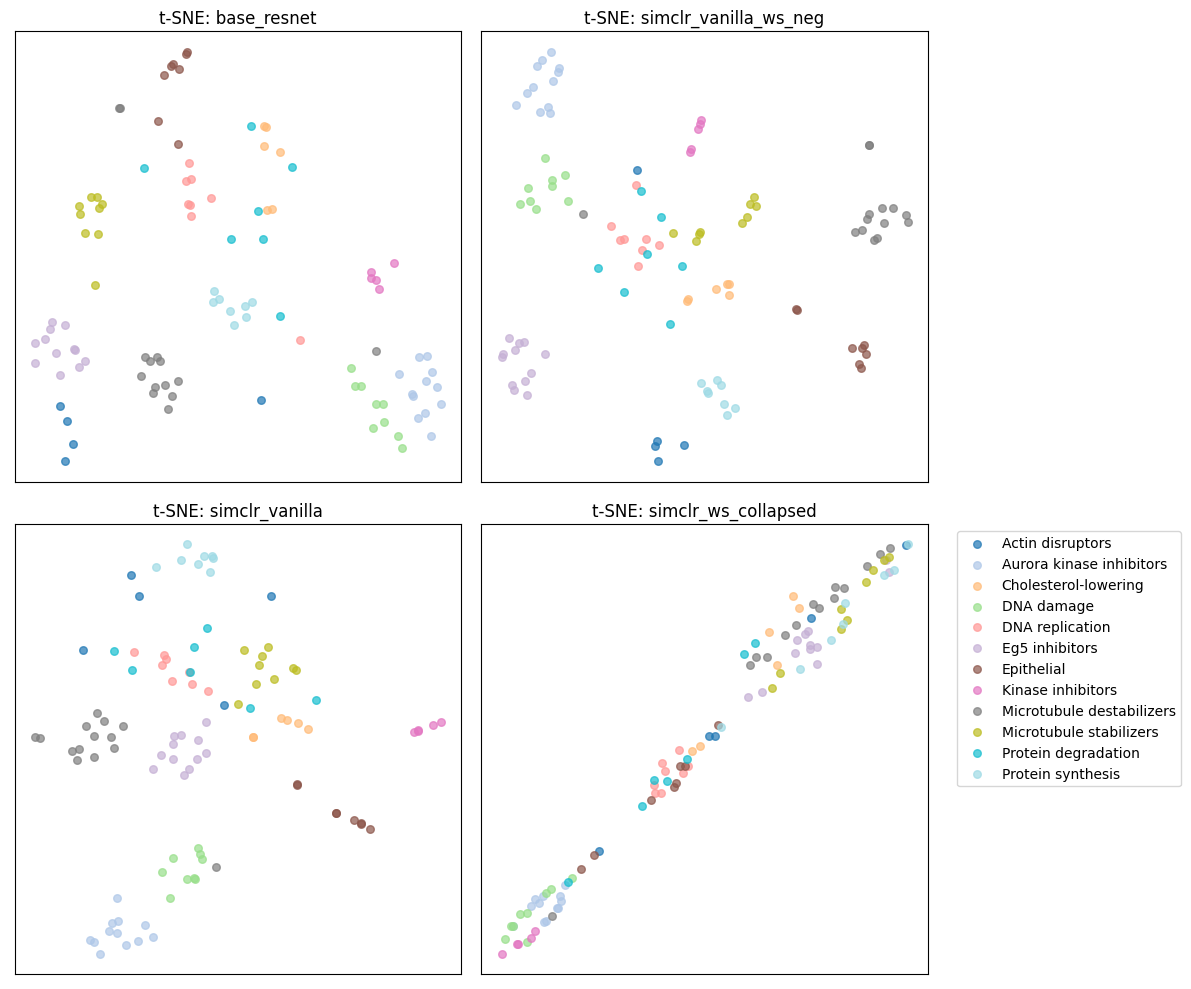

t-SNE comparison saved to /scratch/cv-course2025/group8/plots/tsne_comparison_base_resnet_simclr_vanilla_ws_neg_simclr_vanilla_simclr_ws_collapsed.png


In [6]:
# 4. t-SNE EMBEDDINGS
print("\n" + "="*60)
print("4. t-SNE EMBEDDINGS")
print("="*60)

print("Creating t-SNE visualizations...")
plot_tsne_comparison(
    MODELS_TO_COMPARE,
    data_root=DATA_ROOT,
    output_dir=OUTPUT_DIR
)


5. UMAP EMBEDDINGS
Creating UMAP visualizations...
Running UMAP for base_resnet...
Running UMAP for simclr_vanilla_ws_neg...
Running UMAP for simclr_vanilla...
Running UMAP for simclr_ws_collapsed...


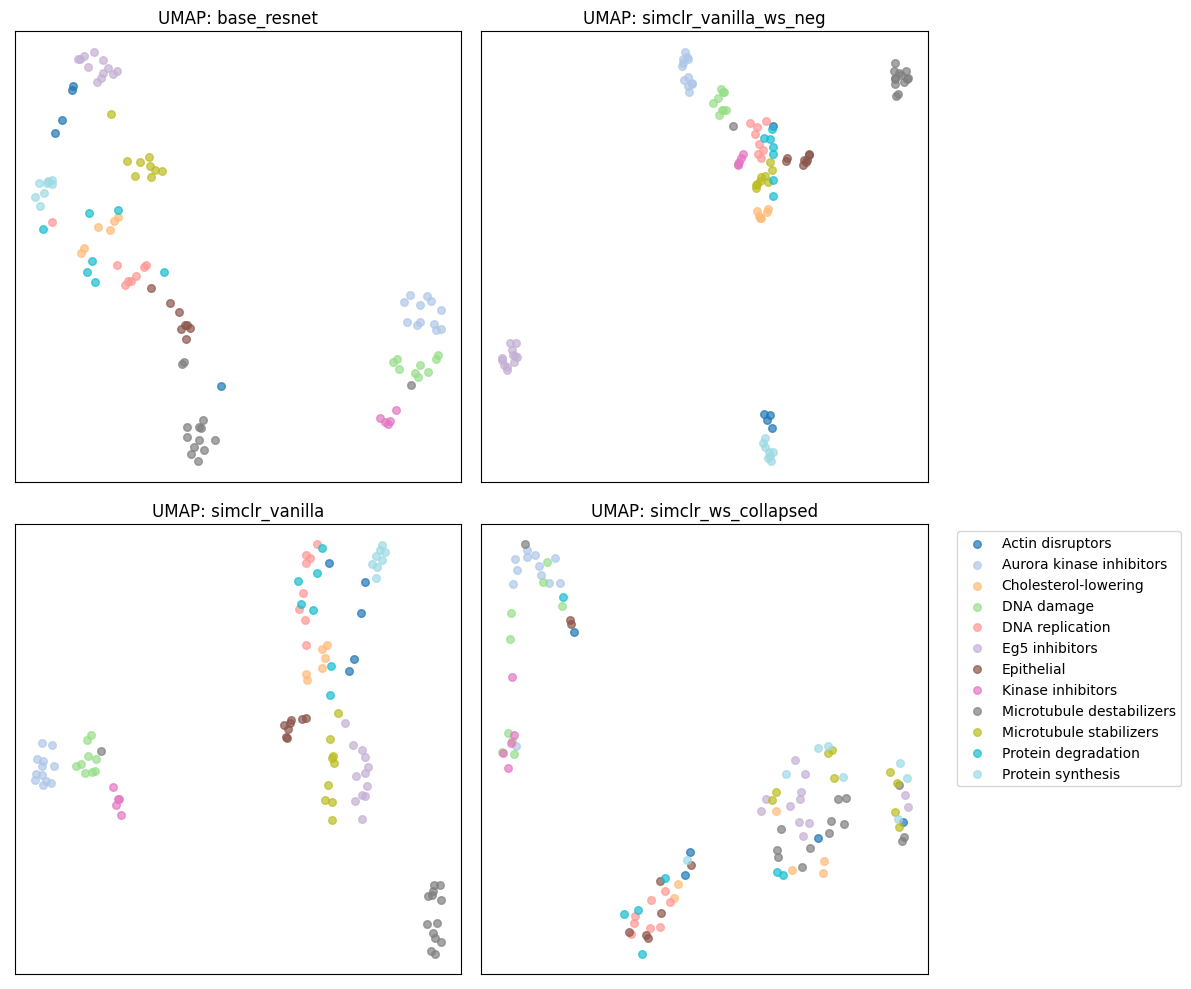

UMAP comparison saved to /scratch/cv-course2025/group8/plots/umap_comparison_base_resnet_simclr_vanilla_ws_neg_simclr_vanilla_simclr_ws_collapsed.png


In [7]:
# 5. UMAP EMBEDDINGS  
print("\n" + "="*60)
print("5. UMAP EMBEDDINGS")
print("="*60)

print("Creating UMAP visualizations...")
plot_umap_comparison(
    MODELS_TO_COMPARE,
    data_root=DATA_ROOT,
    output_dir=OUTPUT_DIR
)